In [1]:
from recomenders import SLIM, ItemBasedCF, PureSVD
from movielens_dataset import *
from evaluation import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_1_M = get_1M_movielens()
data_100k = get_100K_movilens()

La BD has 1000209 ratings
La BD has  6040  users
La BD has  3706  movies
La BD has 100000 ratings
La BD has  943  users
La BD has  1682  movies


# Hit Rate metric
Metric extracted from paper "SLIM: Sparse Linear Methods"

### SLIM
First, I will anlyse the hit rate performance of SLIM model according to the value N and the original rate.

In [3]:
loocv = 1
hits_rate_list = []

print("Prepare data")
data_train, data_test = split_train_val_by_user(data_1_M, assign_=assign_loocv)
user_item = get_user_item(data_train)

Prepare data
Total movies 3706
Filtered movies  3043
(989452, 5)
(6040, 5)
Users: 6040
Movies: 3043


In [31]:
slim = SLIM()
print("Train")
slim.fit(user_item)

Train
Training for item  500
loss  0.3633996075882733
Training for item  1000
loss  0.4563683061768402
Training for item  1500
loss  0.42017708578567264
Training for item  2000
loss  0.3996063713658715
Training for item  2500
loss  0.39718707654027496
Training for item  3000
loss  0.381983280419615


In [32]:
hit_rate(slim, data_test)

,rate,hits,qty,hit_rate
0,1,13,316,0.041139
1,2,55,570,0.096491
2,3,219,1432,0.152933
3,4,518,2065,0.250847
4,5,649,1657,0.391672


In [33]:
print("Evaluate")
top_N = slim.all_useres_recomendation(N=25)
hits_rate_list = []
for n in range(5,30,5):
    hits = hit_rate(slim, data_test,top_N=top_N[:,:n])
    hits["N"] = n
    hits_rate_list.append(hits)
hits_slim_df = pd.concat(hits_rate_list)

Evaluate


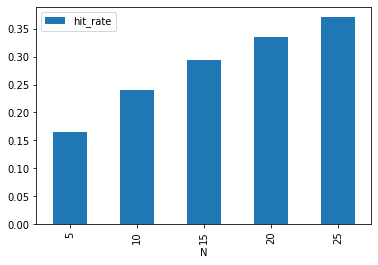

In [34]:
grouped_by_N = hits_slim_df.groupby("N").agg({"hits":"sum", "qty":"sum"})
grouped_by_N["hit_rate"] =  grouped_by_N["hits"]/grouped_by_N["qty"]
grouped_by_N.plot.bar(y="hit_rate")

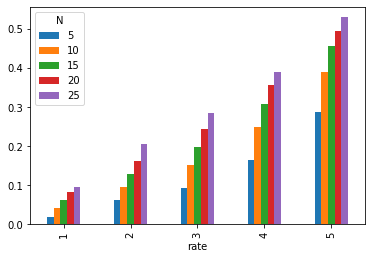

In [35]:
hits_slim_df.pivot("rate", "N", "hit_rate").plot(kind='bar')

### PureSvd

The paper "Performance of Recomender Algorithms" sugest a model called PureSvd that basically exploits the sparcity of the user matrix to efficiently compute a SVD factorization. Following I evaluate and compare hit rate performances with SLIM.

In [53]:
pure_svd = PureSVD(latent_factors=30)
print("Train")
pure_svd.fit(user_item)

Train


In [54]:
print("Evaluate")
top_N = pure_svd.all_useres_recomendation(N=25)
hits_rate_list = []
for n in range(5,30,5):
    hits = hit_rate(pure_svd, data_test,top_N=top_N[:,:n])
    hits["N"] = n
    hits_rate_list.append(hits)
hits_pure_svd_df = pd.concat(hits_rate_list)

Evaluate


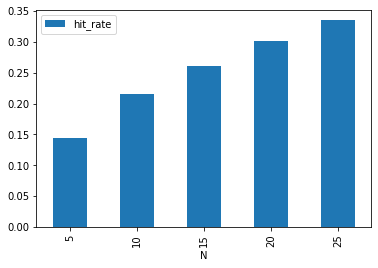

In [55]:
grouped_by_N = hits_pure_svd_df.groupby("N").agg({"hits":"sum", "qty":"sum"})
grouped_by_N["hit_rate"] =  grouped_by_N["hits"]/grouped_by_N["qty"]
grouped_by_N.plot.bar(y="hit_rate")

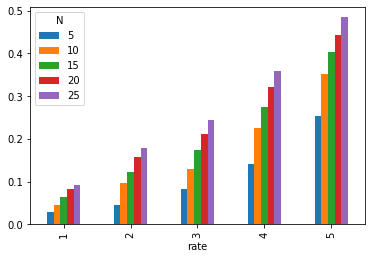

In [56]:
hits_pure_svd_df.pivot("rate", "N", "hit_rate").plot(kind='bar')

Comparision with SLIM model.

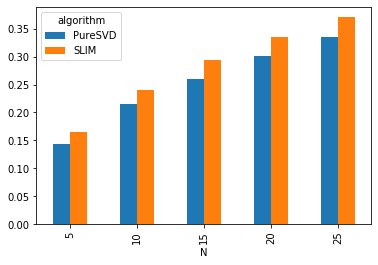

In [57]:
hits_slim_df["algorithm"] = "SLIM"
hits_pure_svd_df["algorithm"] = "PureSVD"
df = pd.concat((hits_slim_df, hits_pure_svd_df))
grouped_by_N = df.groupby(["N", "algorithm"]).agg({"hits":"sum", "qty":"sum"})
grouped_by_N["hit_rate"] =  grouped_by_N["hits"]/grouped_by_N["qty"]
grouped_by_N = grouped_by_N.reset_index()
grouped_by_N.pivot("N", "algorithm", "hit_rate").plot(kind='bar')

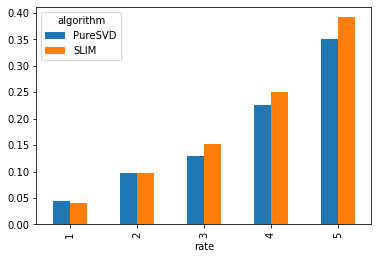

In [58]:
df[df.N == 10].pivot("rate", "algorithm", "hit_rate").plot(kind='bar')

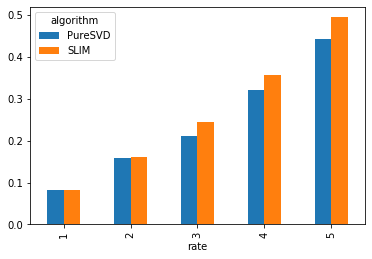

In [59]:
df[df.N == 20].pivot("rate", "algorithm", "hit_rate").plot(kind='bar')

### Item-based
Following is the hit rate analysis of item-based knn model. It uses a smaller dataset in order to accelerate the evaluation.

In [8]:
loocv = 1
hits_rate_list_knn = []
print("Prepare data")
data_train, data_test = split_train_val_by_user(data_100k, assign_=assign_loocv)
user_item = get_user_item(data_train)
knn = ItemBasedCF(knei=40)
print("Train")
knn.fit(data_train)

Prepare data
Total movies 1682
Filtered movies  939
(94025, 8)
(943, 8)
Users: 943
Movies: 939
Train


In [9]:

print("Evaluate")
top_N = knn.all_useres_recomendation(N=25)
for n in range(5,30,5):
    hits = hit_rate(knn, data_test,top_N=top_N[:,:n])
    hits["N"] = n
    hits_rate_list_knn.append(hits)
hits_knn_df = pd.concat(hits_rate_list_knn)
hits_knn_df

Evaluate


,rate,hits,qty,hit_rate,N
0,1,1,42,0.023810,5
1,2,1,101,0.009901,5
2,3,1,258,0.003876,5
3,4,9,334,0.026946,5
4,5,13,208,0.062500,5
0,1,1,42,0.023810,10
1,2,2,101,0.019802,10
2,3,2,258,0.007752,10
3,4,14,334,0.041916,10
4,5,18,208,0.086538,10


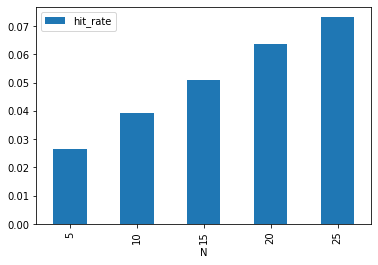

In [10]:
grouped_by_N = hits_knn_df.groupby("N").agg({"hits":"sum", "qty":"sum"})
grouped_by_N["hit_rate"] =  grouped_by_N["hits"]/grouped_by_N["qty"]
grouped_by_N.plot.bar(y="hit_rate")

(0, 0.7)

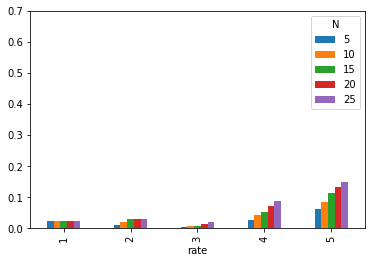

In [28]:
hits_knn_df.pivot("rate", "N", "hit_rate").plot(kind='bar')
plt.ylim((0,0.7))

Due to restrictions of resourses and time, I will compare the SLIM algorithm with respect to the knn item-based algorithm in the 100K Movielens dataset.

In [16]:
loocv = 1
hits_rate_list = []

print("Prepare data")
user_item = get_user_item(data_train)
slim = SLIM()
print("Train")
slim.fit(user_item)

print("Evaluate")
top_N = slim.all_useres_recomendation(N=25)
for n in range(5,30,5):
    hits = hit_rate(slim, data_test,top_N=top_N[:,:n])
    hits["N"] = n
    hits_rate_list.append(hits)
hits_slim_df = pd.concat(hits_rate_list)

Prepare data
Train
Training for item  500
loss  0.8196985341124948
Evaluate


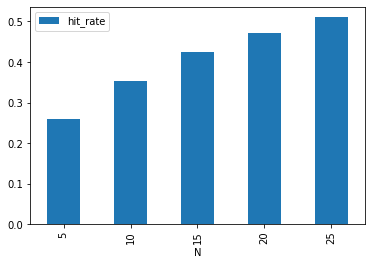

In [17]:
grouped_by_N = hits_slim_df.groupby("N").agg({"hits":"sum", "qty":"sum"})
grouped_by_N["hit_rate"] =  grouped_by_N["hits"]/grouped_by_N["qty"]
grouped_by_N.plot.bar(y="hit_rate")

(0, 0.7)

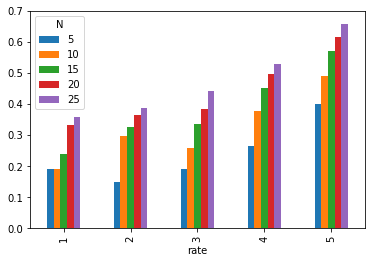

In [29]:
hits_slim_df.pivot("rate", "N", "hit_rate").plot(kind='bar')
plt.ylim((0,0.7))

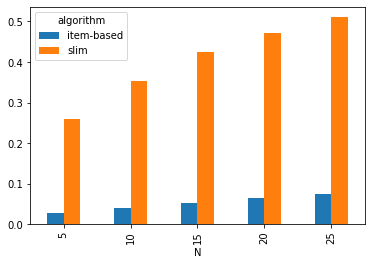

In [26]:
hits_slim_df["algorithm"] = "slim"
hits_knn_df["algorithm"] = "item-based"
df = pd.concat((hits_slim_df,hits_knn_df))
grouped_by_N = df.groupby(["N","algorithm"]).agg({"hits":"sum", "qty":"sum"})
grouped_by_N["hit_rate"] =  grouped_by_N["hits"]/grouped_by_N["qty"]
grouped_by_N = grouped_by_N.reset_index()
grouped_by_N.pivot("N", "algorithm", "hit_rate").plot(kind='bar')

# Precision/recall metrics
Metrics are basen on the paper "Performance of Recomender Algorithms". Principaly, I will anlayse the SLIM and PureSVD algorithms on the 1M MovieLens dataset, in order to see different precision/recall values on different splits of the test set. For that reason I split the dataset according to the paper: data_train, data_test that contains only 5 star raitings (1.4% of the whole dataset, where only 5 stars raitings are selected), T_head that are only popular subset of data_test and T_long that are the not popular subdataset of data_test

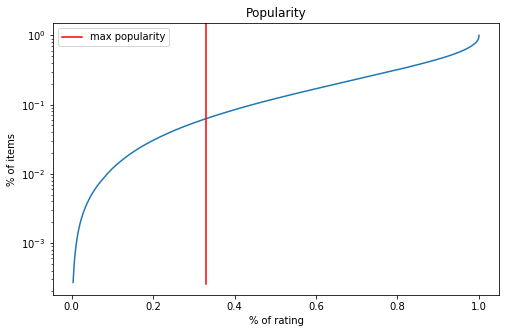

In [76]:
ordered_popularity = data_1_M.groupby("movie_id").agg({"rating": "count"}).sort_values(by="rating", ascending=False)
total = ordered_popularity.rating.sum()
ordered_popularity["rating_percent"] = ordered_popularity.rating / total
ordered_popularity["rating_percent_acum"] = np.cumsum(ordered_popularity.rating_percent.to_numpy())
total_movies = len(ordered_popularity.index)
ordered_popularity["movie_percent"] = 1 / total_movies
ordered_popularity["movies_percent_acum"] = np.cumsum(ordered_popularity.movie_percent.to_numpy())
plt.figure(figsize=(8,5))
plt.plot(ordered_popularity.rating_percent_acum, ordered_popularity.movies_percent_acum)
plt.yscale("log")
plt.title("Popularity")
plt.xlabel("% of rating")
plt.ylabel("% of items")
plt.axvline(x=0.33, ymin=0.04, ymax=1, c="red", label="max popularity")
plt.legend()

In [3]:
data_train, data_test,T_head, T_long = precision_recall_split(data_1_M)
user_item = get_user_item(data_train)

Filtered movies  3043


### SLIM

In [4]:
slim = SLIM()
slim.fit(user_item)

Training for item  500
loss  0.3644510406155326
Training for item  1000
loss  0.45796214561256476
Training for item  1500
loss  0.42146244880572037
Training for item  2000
loss  0.40067218898686874
Training for item  2500
loss  0.39812249351361456
Training for item  3000
loss  0.3827606525199684


In [5]:
N_max = 25
top_N = slim.all_useres_recomendation_precision_recall(N=N_max)
acum_recall_data_test, acum_precision_data_test = compute_precision_recall_by_N(slim, top_N, data_test)
acum_recall_T_head, acum_precision_T_head = compute_precision_recall_by_N(slim, top_N, T_head)
acum_recall_T_long, acum_precision_T_long = compute_precision_recall_by_N(slim, top_N, T_long)

Text(0.5, 1.0, 'SLIM: Recall vs N')

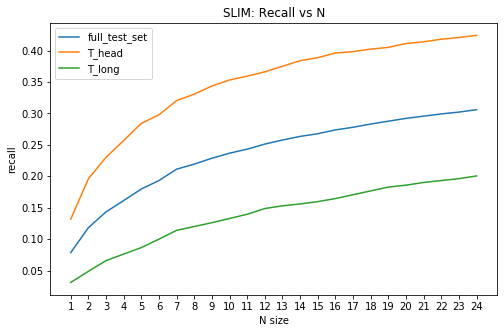

In [6]:
N_range = range(1,N_max)
plt.figure(figsize=(8,5))
plt.plot(N_range, acum_recall_data_test, label="full_test_set")
plt.plot(N_range, acum_recall_T_head, label="T_head")
plt.plot(N_range, acum_recall_T_long, label="T_long")
plt.xticks(N_range)
plt.xlabel("N size")
plt.ylabel("recall")
plt.legend()
plt.title("SLIM: Recall vs N")

Text(0.5, 1.0, 'SLIM: Precision vs Recall')

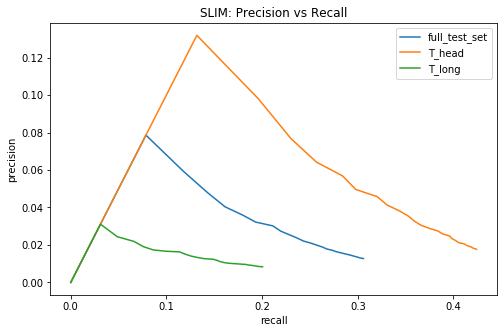

In [7]:
plt.figure(figsize=(8,5))
plt.plot([0]+acum_recall_data_test, [0]+acum_precision_data_test, label="full_test_set")
plt.plot([0]+acum_recall_T_head, [0]+acum_precision_T_head, label="T_head")
plt.plot([0]+acum_recall_T_long, [0]+acum_precision_T_long, label="T_long")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.title("SLIM: Precision vs Recall")

### PureSVD

In [19]:
pure_svd = PureSVD(latent_factors=40)
pure_svd.fit(user_item)

In [20]:
N_max = 25
top_N_pure_svd = pure_svd.all_useres_recomendation_precision_recall(N=N_max)
acum_recall_data_test_pure_svd, acum_precision_data_test_pure_svd = compute_precision_recall_by_N(pure_svd, top_N_pure_svd, data_test)
acum_recall_T_head_pure_svd, acum_precision_T_head_pure_svd = compute_precision_recall_by_N(pure_svd, top_N_pure_svd, T_head)
acum_recall_T_long_pure_svd, acum_precision_T_long_pure_svd = compute_precision_recall_by_N(pure_svd, top_N_pure_svd, T_long)

Text(0.5, 1.0, 'PureSVD: Recall vs N')

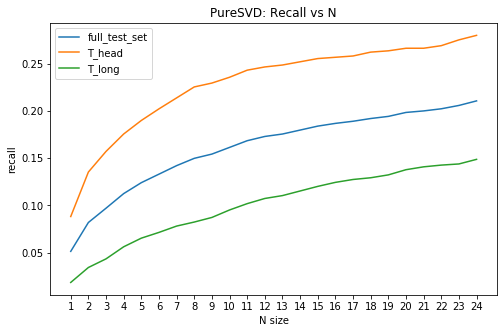

In [21]:
N_range = range(1,N_max)
plt.figure(figsize=(8,5))
plt.plot(N_range, acum_recall_data_test_pure_svd, label="full_test_set")
plt.plot(N_range, acum_recall_T_head_pure_svd, label="T_head")
plt.plot(N_range, acum_recall_T_long_pure_svd, label="T_long")
plt.xticks(N_range)
plt.xlabel("N size")
plt.ylabel("recall")
plt.legend()
plt.title("PureSVD: Recall vs N")

Text(0.5, 1.0, 'SLIM: Precision vs Recall')

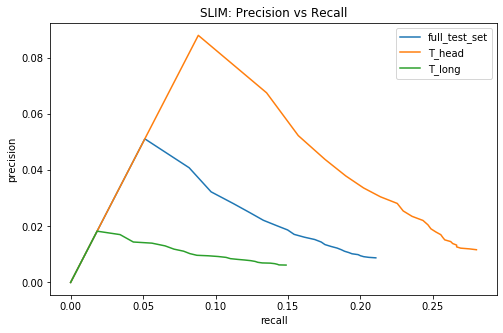

In [22]:
plt.figure(figsize=(8,5))
plt.plot([0]+acum_recall_data_test_pure_svd, [0]+acum_precision_data_test_pure_svd, label="full_test_set")
plt.plot([0]+acum_recall_T_head_pure_svd, [0]+acum_precision_T_head_pure_svd, label="T_head")
plt.plot([0]+acum_recall_T_long_pure_svd, [0]+acum_precision_T_long_pure_svd, label="T_long")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.title("SLIM: Precision vs Recall")

#### SLIM and PureSVD comparision

Text(0.5, 1.0, 'PureSVD: Recall vs N')

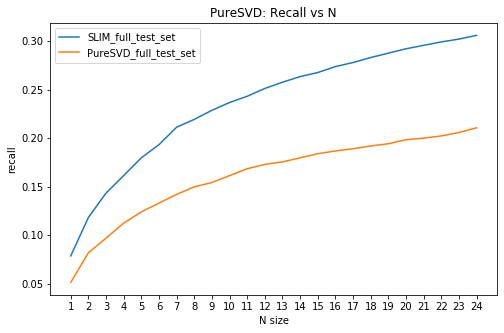

In [23]:
N_range = range(1,N_max)
plt.figure(figsize=(8,5))
plt.plot(N_range, acum_recall_data_test, label="SLIM_full_test_set")
plt.plot(N_range, acum_recall_data_test_pure_svd, label="PureSVD_full_test_set")
plt.xticks(N_range)
plt.xlabel("N size")
plt.ylabel("recall")
plt.legend()
plt.title("SLIM vs PureSVD: Recall vs N full_test_set")

Text(0.5, 1.0, 'SLIM vs PureSVD: Recall vs N T_head')

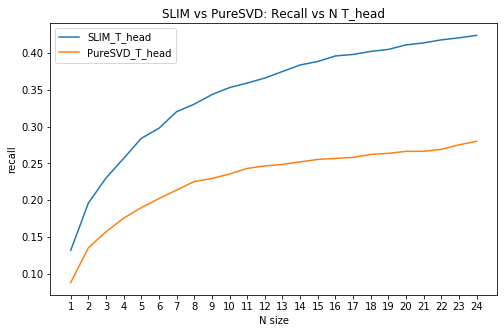

In [26]:
N_range = range(1,N_max)
plt.figure(figsize=(8,5))
plt.plot(N_range, acum_recall_T_head, label="SLIM_T_head")
plt.plot(N_range, acum_recall_T_head_pure_svd, label="PureSVD_T_head")
plt.xticks(N_range)
plt.xlabel("N size")
plt.ylabel("recall")
plt.legend()
plt.title("SLIM vs PureSVD: Recall vs N T_head")

Text(0.5, 1.0, 'SLIM vs PureSVD: Recall vs N T_long')

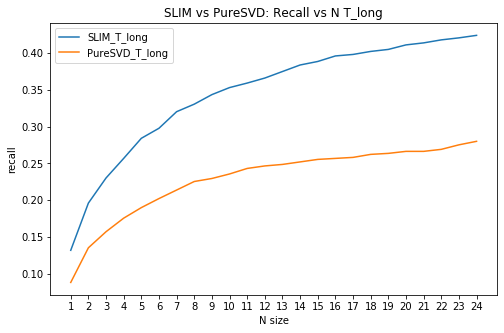

In [27]:
N_range = range(1,N_max)
plt.figure(figsize=(8,5))
plt.plot(N_range, acum_recall_T_head, label="SLIM_T_long")
plt.plot(N_range, acum_recall_T_head_pure_svd, label="PureSVD_T_long")
plt.xticks(N_range)
plt.xlabel("N size")
plt.ylabel("recall")
plt.legend()
plt.title("SLIM vs PureSVD: Recall vs N T_long")

### MAE and RMSE accuracy
As I am using diferent datasets on the algorithms I will compute SLIM and PureSVD MAE and RMSE with the 1M MovieLens dataset first. After that I will add item-based memory model, so I retrain every model again with 100k MovieLens.
Again the split on datsets will be different, I will sample 10% for testing and assuring that all movies and all users are in both splits